In [1]:
# === cleaning_data.ipynb ================================================
# =====================================================================
# Objetivo de limpar os dados para as proximas análises e manipulações
# Uso de pandas para manipulação dos dados, seaborn e matplotlib para visualização de valores

In [1]:
# === Bibliotecas =========
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
"""
O time de Data Science solicitou:

Um dataset limpo com:

Todas as colunas relevantes (ID do Cliente, Data da Compra, Valor da Compra, Produto, Região, Idade)

Dados com valores nulos tratados (preenchidos ou removidos)

Colunas categóricas convertidas para valores numéricos.

"""

'\nO time de Data Science solicitou:\n\nUm dataset limpo com:\n\nTodas as colunas relevantes (ID do Cliente, Data da Compra, Valor da Compra, Produto, Região, Idade)\n\nDados com valores nulos tratados (preenchidos ou removidos)\n\nColunas categóricas convertidas para valores numéricos.\n\n'

In [69]:
df = pd.read_csv(r"..\data\raw\dataset.csv") # Extraindo os dados e transformando em um DataFrame

In [70]:
df.head(10) # Lendo as 10 primeiras linhas

,ID_Cliente,Nome_Cliente,Idade,Região,Data_Compra,Valor_Compra,Produto
0,C0001,Cliente 1,58.0,Norte,2023-01-26,296.25,Produto 17
1,C0001,Cliente 1,58.0,Norte,2023-09-29,87.14,Produto 17
2,C0001,Cliente 1,58.0,Norte,2023-02-11,427.16,Produto 3
3,C0001,Cliente 1,58.0,Norte,2023-11-01,43.30,Produto 8
4,C0001,Cliente 1,58.0,Norte,2023-07-26,68.74,Produto 19
5,C0001,Cliente 1,58.0,Norte,2023-05-07,293.67,Produto 2
6,C0001,Cliente 1,58.0,Norte,2023-11-14,50.17,Produto 19
7,C0001,Cliente 1,58.0,Norte,2023-10-17,266.16,Produto 9
8,C0001,Cliente 1,58.0,NaN,2023-04-15,338.17,Produto 11
9,C0001,Cliente 1,58.0,Norte,2023-05-03,140.15,Produto 5


In [71]:
df.isnull().sum() # Verificando se há valores nulos

ID_Cliente        0
Nome_Cliente      0
Idade           137
Região          137
Data_Compra       0
Valor_Compra    137
Produto           0
dtype: int64

In [72]:
df.info() # Verificando a formatação do DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2731 entries, 0 to 2730
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Cliente    2731 non-null   object 
 1   Nome_Cliente  2731 non-null   object 
 2   Idade         2594 non-null   float64
 3   Região        2594 non-null   object 
 4   Data_Compra   2731 non-null   object 
 5   Valor_Compra  2594 non-null   float64
 6   Produto       2731 non-null   object 
dtypes: float64(2), object(5)
memory usage: 149.5+ KB


In [73]:
df.describe()

,Idade,Valor_Compra
count,2594.000000,2594.000000
mean,40.163840,255.055563
std,14.463025,139.676096
min,18.000000,10.330000
25%,28.000000,134.162500
50%,40.000000,257.035000
75%,55.000000,371.940000
max,65.000000,499.720000


In [74]:
# === Transformando os dados =====================
"""
Há valores nulos a serem tratados nas colunas idade, região e Valor_compra
As colunas devem receber o tipo certo
Aparentemente não há outliers em idade mas há em Valor_Compra

"""


'\nHá valores nulos a serem tratados nas colunas idade, região e Valor_compra\nAs colunas devem receber o tipo certo\nAparentemente não há outliers em idade mas há em Valor_Compra\n\n'

In [75]:
# Filtrando os dados para entender o contexto
df[df['Idade'].isnull()]

,ID_Cliente,Nome_Cliente,Idade,Região,Data_Compra,Valor_Compra,Produto
32,C0001,Cliente 1,NaN,Norte,2023-10-10,82.57,Produto 5
44,C0002,Cliente 2,NaN,Sul,2023-04-25,21.60,Produto 7
73,C0002,Cliente 2,NaN,Sul,2023-03-17,21.97,Produto 8
80,C0002,Cliente 2,NaN,Sul,2023-08-26,34.61,Produto 8
93,C0003,Cliente 3,NaN,Leste,2023-04-29,197.69,Produto 5
...,...,...,...,...,...,...,...
2662,C0098,Cliente 98,NaN,Sul,2023-02-22,413.57,Produto 2
2663,C0098,Cliente 98,NaN,Sul,2023-09-17,61.65,Produto 4
2694,C0098,Cliente 98,NaN,Sul,2023-06-21,201.10,Produto 5
2725,C0099,Cliente 99,NaN,Leste,2023-08-22,241.94,Produto 6


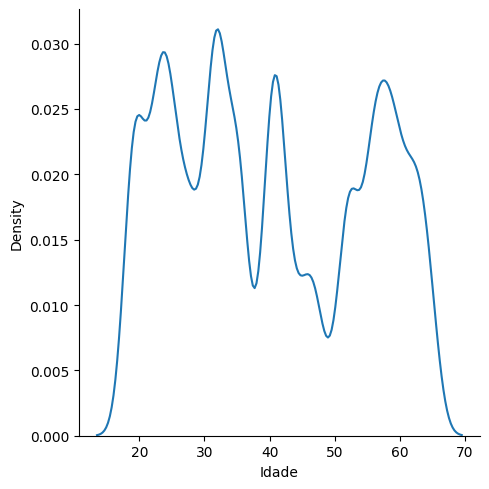

In [76]:
# Criando um gráfico para analisar a distribuição
sns.displot(df.Idade,kind="kde", bw_adjust=.50)
plt.show()

In [83]:
# Após entender o contexto, optei por preencher os valores com a média de 40 ao invés de mediana
media_idade = df["Idade"].mean()
df["Idade"].fillna(media_idade, inplace=True)
df.isnull().sum()
#Dados nulos preenchidos com sucesso

C:\Users\Win\AppData\Local\Temp\ipykernel_10428\3920257421.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Idade"].fillna(media_idade, inplace=True)


ID_Cliente        0
Nome_Cliente      0
Idade             0
Região          137
Data_Compra       0
Valor_Compra    137
Produto           0
dtype: int64

In [86]:
df[df["Região"].isnull()] # Visualizando os valores nulos de Região


,ID_Cliente,Nome_Cliente,Idade,Região,Data_Compra,Valor_Compra,Produto


In [87]:
df["Região"].fillna('Desconhecido', inplace=True) # Optando por preencher os valores de região com 'Desconhecido'

In [ ]:
df[df["Valor_Compra"].isnull()] 

,ID_Cliente,Nome_Cliente,Idade,Região,Data_Compra,Valor_Compra,Produto
14,C0001,Cliente 1,58.0,Norte,2023-09-17,NaN,Produto 12
17,C0001,Cliente 1,58.0,Norte,2023-12-27,NaN,Produto 17
33,C0001,Cliente 1,58.0,Desconhecido,2023-01-22,NaN,Produto 2
47,C0002,Cliente 2,25.0,Sul,2023-07-24,NaN,Produto 18
49,C0002,Cliente 2,25.0,Sul,2023-05-14,NaN,Produto 9
...,...,...,...,...,...,...,...
2612,C0097,Cliente 97,28.0,Norte,2023-09-07,NaN,Produto 20
2621,C0097,Cliente 97,28.0,Desconhecido,2023-03-01,NaN,Produto 5
2631,C0097,Cliente 97,28.0,Norte,2023-09-20,NaN,Produto 20
2660,C0098,Cliente 98,47.0,Desconhecido,2023-08-13,NaN,Produto 4


In [90]:
"""
Como não tenho conhecimento para saber se os dados nulos de valor de compra se dão por cancelamento ou algo do tipo, vou optar por criar um df separado e salvar o arquivo para manter os dados que estão nulos, deixando o df apenas com os dados corretos
"""
valores_nulos = df.query('Valor_Compra.isnull()', engine='python')
print("DataFrame com valores nulos:")
print(valores_nulos)
valores_nulos.to_csv(r'../data/processed/valores_nulos.csv', index=False) # Salvando o df com os valores nulos caso precise consultar depois.

DataFrame com valores nulos:
     ID_Cliente Nome_Cliente  Idade        Região Data_Compra  Valor_Compra  \
14        C0001    Cliente 1   58.0         Norte  2023-09-17           NaN   
17        C0001    Cliente 1   58.0         Norte  2023-12-27           NaN   
33        C0001    Cliente 1   58.0  Desconhecido  2023-01-22           NaN   
47        C0002    Cliente 2   25.0           Sul  2023-07-24           NaN   
49        C0002    Cliente 2   25.0           Sul  2023-05-14           NaN   
...         ...          ...    ...           ...         ...           ...   
2612      C0097   Cliente 97   28.0         Norte  2023-09-07           NaN   
2621      C0097   Cliente 97   28.0  Desconhecido  2023-03-01           NaN   
2631      C0097   Cliente 97   28.0         Norte  2023-09-20           NaN   
2660      C0098   Cliente 98   47.0  Desconhecido  2023-08-13           NaN   
2697      C0099   Cliente 99   42.0         Leste  2023-06-09           NaN   

         Produto  
14 

In [94]:
df.dropna(subset=['Valor_Compra'], inplace=True) # Removendo as linhas com dados nulos da tabela

In [92]:
df.isnull().sum()

ID_Cliente      0
Nome_Cliente    0
Idade           0
Região          0
Data_Compra     0
Valor_Compra    0
Produto         0
dtype: int64

In [96]:
# Validando as colunas para garantir que tenham o tipo correto
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2594 entries, 0 to 2730
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Cliente    2594 non-null   object 
 1   Nome_Cliente  2594 non-null   object 
 2   Idade         2594 non-null   float64
 3   Região        2594 non-null   object 
 4   Data_Compra   2594 non-null   object 
 5   Valor_Compra  2594 non-null   float64
 6   Produto       2594 non-null   object 
dtypes: float64(2), object(5)
memory usage: 162.1+ KB


In [98]:
df["Idade"] = df["Idade"].astype(int) # Corrigindo idade para int
df["Data_Compra"] = pd.to_datetime(df["Data_Compra"]).dt.date # Corrigindo data_compra para date

In [100]:
df.head()

,ID_Cliente,Nome_Cliente,Idade,Região,Data_Compra,Valor_Compra,Produto
0,C0001,Cliente 1,58,Norte,2023-01-26,296.25,Produto 17
1,C0001,Cliente 1,58,Norte,2023-09-29,87.14,Produto 17
2,C0001,Cliente 1,58,Norte,2023-02-11,427.16,Produto 3
3,C0001,Cliente 1,58,Norte,2023-11-01,43.30,Produto 8
4,C0001,Cliente 1,58,Norte,2023-07-26,68.74,Produto 19


In [102]:
df.to_csv("../data/processed/dataset_processed.csv", index=False) # salvando o arquivo limpo e transformado